In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = '/Users/forheart/Downloads/yelp_dataset/yelp_academic_dataset_review.json'

In [3]:
max_records = 1e5
df = pd.read_json(file, lines=True, chunksize=max_records)
data = pd.DataFrame()
try:
   for df_chunk in df:
       data = pd.concat([data, df_chunk])
except ValueError:
       print ('\nSome messages in the file cannot be parsed')

In [4]:
data.shape

(5996996, 9)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [8]:
# Create a pandas series containing the number of reviews for all businesses.
bybusiness = data['business_id'].value_counts()

In [9]:
df_business = pd.DataFrame({'business_id':bybusiness.index, 'review_counts':bybusiness.values})

In [10]:
df_business.shape

(188593, 2)

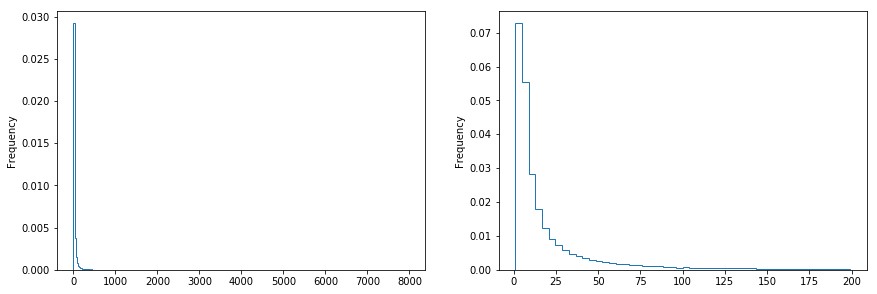

In [13]:
plt.subplot(1, 2, 1)
df_business['review_counts'].plot(kind='hist', bins=300, histtype='step', density=True)
plt.subplot(1, 2, 2)
df_business['review_counts'][df_business['review_counts'] < 200].plot(kind='hist', bins=50, histtype='step', density=True)
plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=1, wspace=None)

In [18]:
print(np.percentile(df_business['review_counts'], [0, 95]))
print(np.percentile(df_business['review_counts'], [0, 75]))

[  1. 123.]
[ 1. 24.]


The histograms of the review counts show and 95% percentile show that 95% of business have less than 123 reviews, and 75% of the businesses have less than 24 reviews. In order to avoid those businesses that have very little reviews, I will randomly sample 1000 busineses from the top 5% businesses with most reviews. 

In [24]:
# the 5% businesses (9430 businesses) with most reviews. These busineses have more than 123 reviews.
business_sample = df_business.iloc[:9430]

# Ramdomly sample 1000 businesses.
business_sub = business_sample.sample(1000, random_state=1)

In [25]:
business_sub['review_counts'].sum()

308429

In [27]:
business_sub.head()

,business_id,review_counts
7555,fpADWrjAQwJJrBMBdBCvJg,146
3005,eOl6WS3oAjtGZpcXfv8tlA,282
5636,mnU3iGsL55MCWXiWV3AcAQ,183
8800,2gI7dlktBQXPZiuOW-HWvw,129
3832,JogUSDKa1xyG3lLEmD4Xjg,242


In [28]:
review = pd.merge(business_sub, data, on='business_id', how='left')

In [29]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308429 entries, 0 to 308428
Data columns (total 10 columns):
business_id      308429 non-null object
review_counts    308429 non-null int64
cool             308429 non-null int64
date             308429 non-null datetime64[ns]
funny            308429 non-null int64
review_id        308429 non-null object
stars            308429 non-null int64
text             308429 non-null object
useful           308429 non-null int64
user_id          308429 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 25.9+ MB


In [39]:
review = review.drop(columns=['review_counts', 'cool', 'funny', 'useful'])

In [40]:
review.head()

,business_id,date,review_id,stars,text,user_id
0,fpADWrjAQwJJrBMBdBCvJg,2016-12-19,OEmutkjxr6ievjXvrgFGMA,1,"WOWOWOowow, jeeeeeeeeeeeeze. There is so much ...",0WcHiM_jT1jN-wxk790qBg
1,fpADWrjAQwJJrBMBdBCvJg,2017-05-23,qOqpwCwGtZH9RJc2gs4Dew,1,This location has the worst drive through I've...,Vo_68hV91XR04bZ993MKCg
2,fpADWrjAQwJJrBMBdBCvJg,2015-04-26,FWUnbMw4TvgdrBZD8G0JNw,1,"First time I tried Tropical smoothie, not impr...",0rHzL5Qy-IFrwSmRKehx2Q
3,fpADWrjAQwJJrBMBdBCvJg,2017-08-30,miJm99wYp5Z0SOzCwXtzVw,1,If you enjoy spending 10 mins in drive thru be...,SwzCXae8zEi77FA3hjYd1w
4,fpADWrjAQwJJrBMBdBCvJg,2014-06-14,nHTCFqKMq85UQKqGFMVA2Q,5,I gave it 5 stars just because I didn't have a...,hktqVwzT-qIordt-MAfa-Q


The 5 star reviews have the most counts, followed by 4, 3, 1 and 2.

In [37]:
print('There are {} unique users that wrote {} reviews.'.format(review.user_id.nunique(), review.shape[0]))

There are 205267 unique users that wrote 308429 reviews.


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [46]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(review.text)
X = X.tocsc()
y = review.stars.values

In [47]:
# Multinomial Naive Bayes without cross validation
nb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.6547257672963367
The accuracy score for the test set is 0.6114353337872451


In [49]:
# Multinomial Naive Bayes with cross validation
nb = MultinomialNB()
cv_scores = cross_val_score(nb, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.59130773 0.58949211 0.60009402 0.59925428 0.60804436]
Average 5-Fold CV Score: 0.5976384998005246


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=1, stop_words='english')
X_tfidf = tfidfvectorizer.fit_transform(review.text)
y_tfidf = review.stars.values

In [51]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=1, stratify=y)
clf_tfidf = MultinomialNB().fit(Xt_train, yt_train)

In [52]:
print('The accuracy score for the train set is', clf_tfidf.score(Xt_train, yt_train))
print('The accuracy score for the test set is', clf_tfidf.score(Xt_test, yt_test))

The accuracy score for the train set is 0.545413649019425
The accuracy score for the test set is 0.5247057679214084
